# Содержание
1. Сборный проект. Описание данных
1. Просмотр общей информации
2. Подготовка данных
3. Исследовательский анализ данных
4. Портрет пользователя каждого региона
5. Проверим гипотезы
6. Вывод

# 1. Сборный проект 

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам предствоит выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. \
Перед yами данные до 2016 года.  \
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных:**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. \
Данные за 2016 год могут быть неполными.

**План работы** над данными будет включать:
- Просмотр данных
- Предоработку данных
- Исследовательский анализ данных
- Проверку гипотез
- Общий вывод

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

import warnings
warnings.filterwarnings(action='ignore')

## 2. Просмотр общей информации

In [3]:
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
#переменная для дальнейшей проверки
old_data = data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
print('В датасете', data.shape[0], 'строк и', data.shape[1], 'столбцов')

В датасете 16715 строк и 11 столбцов


При первом просмотр данных видно, что некоторые столбцы имеют пропуски ('Name', 'Year_of_Release', 'Genre ', 'Critic_Score', 'User_Score', 'Rating'). Также названия столбцов содержат строчные буквы, что не очень удобно и может привести к ошибкам. Также в столбцах 'User_Score' и 'Year_of_Release' нужно поменять тип данных.

# 3. Подготовка данных

### Обработка названий столбцов

In [7]:
#приведем названия столбцов к нижнему регистру
data = data.rename(columns=str.lower)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Проверим данные

Будем проверять столбцы с годами, оценками и рейтингами.

In [8]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Отметим, что рейтинг присваивается от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. 
- «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. 
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. 
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».
- «K-A» («Kids to Adults»)— «Для детей и взрослых»: Содержание игры вполне подходит для возрастной категории от 6 лет и старше. Этот рейтинг был заменён на «Everyone» 1 января 1998 года и может встречаться только в играх, изданных ранее.
- «AO»(«Adults Only 18+») — «Только для взрослых». Содержание игры только для взрослых старше 18 лет.
- «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет.
- «RP» («Rating Pending»") — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.

Так как рейтинг K-A является устревшим названием рейтинга E, его стоит заменить и в наших данных. Также ретинг RP заменим на Nan.

In [9]:
data = data.replace('K-A', 'E')

In [10]:
data = data.replace('RP', np.nan)

In [11]:
data['year_of_release'].value_counts().sort_values()

1980.0       9
1985.0      14
1984.0      14
1988.0      15
1990.0      16
1987.0      16
1983.0      17
1989.0      17
1986.0      21
1982.0      36
1991.0      41
1992.0      43
1981.0      46
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1999.0     338
2000.0     350
1998.0     379
2001.0     482
2016.0     502
2013.0     544
2014.0     581
2015.0     606
2012.0     653
2004.0     762
2003.0     775
2002.0     829
2005.0     939
2006.0    1006
2011.0    1136
2007.0    1197
2010.0    1255
2009.0    1426
2008.0    1427
Name: year_of_release, dtype: int64

С годами все верно: данные за 1980-2008 года.

In [12]:
print(data['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


Данные не выходят за диапазон 0-100, но здесь мы выдим значение tbd - (to be determined = будет определено). Лучше заменить такие значения на Nan.

In [13]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [14]:
print(data['critic_score'].max())
print(data['critic_score'].min())
print(data['critic_score'].unique())

98.0
13.0
[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]


В оценках критиков всё хорошо, данные не выходят за 0-100. Лишних значений нет.

#### Проверим дубликаты

In [15]:
data.duplicated().sum()

0

По всем столбцам явных дубликатов нет.

In [16]:
#проверим дубликаты по 3 столбцам 
data.loc[data.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [17]:
#удалим их
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first').reset_index(drop=True)

In [18]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

В столбце с жанрами неявных дубликатов нет.

In [19]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

С названиями платформ все корректно. \
Wii - компания Nintendo \
NES - компания Nintendo \
GB - компания Nintendo \
DS - компания Nintendo \
X360 - компания Microsoft \
PS3 - компания Sony \
PS2 - компания Sony \
SNES - компания Nintendo \ 
GBA - компания Nintendo \
PS4 - компания Sony \
3DS - компания Nintendo \
N64 - компания Nintendo \ 
PS  - компания Sony \
XB - компания Microsoft \
PC - компьютер \
2600 -компания Atari \
PSP - компания Sony \
XOne - компания Microsoft \
WiiU - компания Nintendo \
GC - компания GSC Game World \
GEN - компания Sega \
DC - компания DC Studios \
PSV - компания Sony 


### Обработаем пропуски

Посчитаем количество пропусков в каждом столбце

In [20]:
na_table = data.isna().sum()
na_table

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         9124
rating             6768
dtype: int64

In [21]:
#найдем процентное соотношение пропусков
round((na_table/16713)*100, 2)

name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         54.59
rating             40.50
dtype: float64

От данных с пропусками в name и year_of_release  можно спокойно избавится, так как они занимают всего 0.01% и 1.61% от данных.

- В столбце **name** пропуски можно удалить.
- В столбец **year_of_release** также можно удалить пустые значения
- В столбцах **critic_score, user_score** будет неккоректно заполнять пустые значения чем-либо другим, поэтому лучше оставить их пустыми.
- В столбцах **rating** лучше заменить пропуски словом 'unrated', чтобы видеть в статистике и игры без рейтинга

In [22]:
data = data.dropna(subset=['name'])

In [23]:
data = data.dropna(subset=['year_of_release'])

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   object 
 10  rating           9766 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Теперь в других столбцах нет пропущенных значений, кроме critic_score, user_score и rating.

In [25]:
#заменить пропуски в rating
data['rating'] = data['rating'].fillna('unrated')

In [26]:
#переменная для проверки
new_data = data

In [27]:
#проверим долю отбрасываемых начений
round(1 - new_data.shape[0] / old_data.shape[0], 3) * 100

1.6

Мы отбросили всего 1.6% всех данных, что вполне допустимо.

### Изменим тип данных

В столбце **'user_score'** приведем данные к типу float, а в **'year_of_release'** нужно привести значения к целому числу..

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   object 
 10  rating           16443 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Изменить тип данных нужно в:
- year_of_release - привести к целому
- user_score - поменять на вещественный

In [29]:
data['year_of_release'] = data['year_of_release'].astype(int)

In [30]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Были проверены данные и удалены(или заменены) некорректные значения в столбце rating. Были удалены все явные дубликаты, а также пропуски. Это отбросило 1.6% всех данных. Заменен тип данных в столбце с годом на int, а в столбце с пользовательским рейтингом приведен к вещественному числу.

### Посчитаем суммарные продажи по регионам

In [32]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [33]:
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unrated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unrated,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unrated,0.01
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unrated,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unrated,0.01
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unrated,0.01


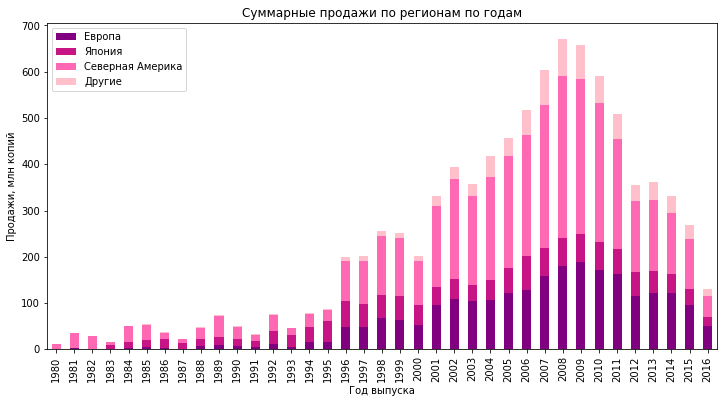

In [34]:
#посмотрим на графике
fig, ax = plt.subplots()
colors = ['purple', 'mediumvioletred', 'hotpink', 'pink']
data.pivot_table(index='year_of_release', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum').plot(kind='bar', stacked=True, ax=ax, figsize=(12,6), color=colors);

plt.legend(['Европа', 'Япония', 'Северная Америка', 'Другие' ])
ax.set_title('Суммарные продажи по регионам по годам')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Год выпуска');

Судя по графику, продажи в Северной Америке превышают остальные регионы, за ней следует Европа. Доля Японии и других регионов довольно мала. Пик продаж игр приходится на 2008-2009 годы, после началось снижение суммарных продаж. Также активный рост продаж компьютерных игр начался после 1996 года.

Был добавлен стобец с общими данные по продажам для дальнейшего анализа, который показал, что пик продаж игр приходится на 2008-2009 годы, однако в настоящее вемя идет тенденция к снижению таких продаж.

# 4. Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы.

In [35]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unrated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unrated,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unrated,0.01
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unrated,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unrated,0.01
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unrated,0.01


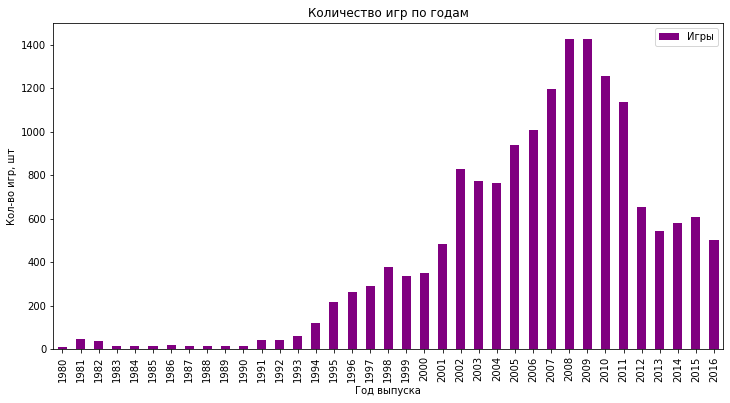

In [36]:
#посмотрим на графике
colors = ['purple']
data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', figsize=(12,6), color=colors);

plt.legend(['Игры'])
plt.title('Количество игр по годам')
plt.ylabel('Кол-во игр, шт')
plt.xlabel('Год выпуска');

На графике видно, что количество игр начало расти в 1994 году. Наибольшее их количество выпускалось в период с 2002 по 2011 год, после уже пошло падение. \
Такой рост в 1990-х годах связан с инновациями в сфере игр. По данным из Википедии, в этот период, огсновными достижениями называли переход от растровой графики к полностью полигональному 3D, снижение популярности аркадных игр и появление нескольких новых жанров - шутер от первого лица, стратегия в реальном времени и MMO. Также в 1994 году Electronic Arts выпустили Need for Speed, которая стала одной из десяти самых успешных серий видеоигр в целом. \
При анализе данных можно брать не все периоды, а только с 2012, так как они будут более актуальны для нашего времени и уровня развития игр.

### Посмотрим, как менялись продажи по платформам.

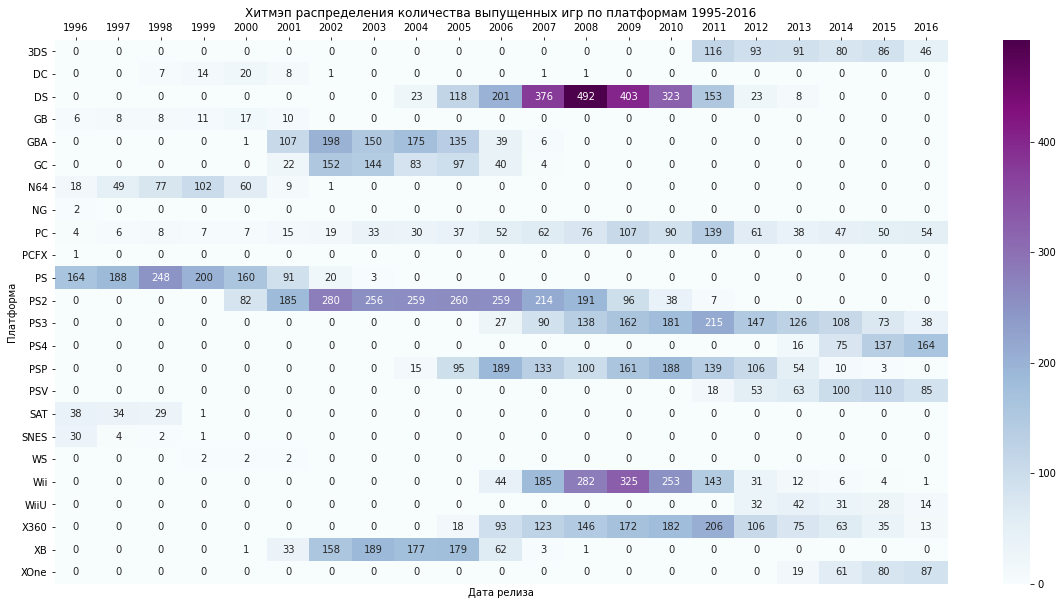

In [37]:
data_heatmap = data.query('year_of_release > 1995')
count_by_platforms = data_heatmap.pivot_table(index='platform', 
                                      values='total_sales', 
                                      columns = 'year_of_release', 
                                      aggfunc = 'count',
                                      fill_value=0)


plt.figure(figsize=(20,10))
ax = sns.heatmap(count_by_platforms, annot=True, fmt="d", cmap='BuPu')
ax.set(xlabel="Дата релиза", ylabel="Платформа")
plt.title('Хитмэп распределения количества выпущенных игр по платформам 1995-2016')
ax.xaxis.tick_top()

На хитмэпе можно увидеть, что до 2001 года самой популярной платформой была PS(компания Sony). Потом на смену ей пришли PS2 (компания Sony), а также немалую популярность имела XB(компания Microsoft). В 2006 году более значимой стала DS(компания Nintendo), появилась PS3(Sony) и одной из самых востребованных была X360. А в 2011 году можно заметить 3DS(компания Nintendo) и PSP.  \
Можно заметить, что в основном платформы удерживают большую долю в производстве игр примерно 7 лет, после этого их сменяют другие плтаформы. Это скорее всего связано с разработкой той же компанией новой, обновленной платформы, они перестают поддерживать производидство игр на предыдущей. \
Ближе к актуальному периоду, к 2016 году, популярными стали PS4, PSV и XOne.

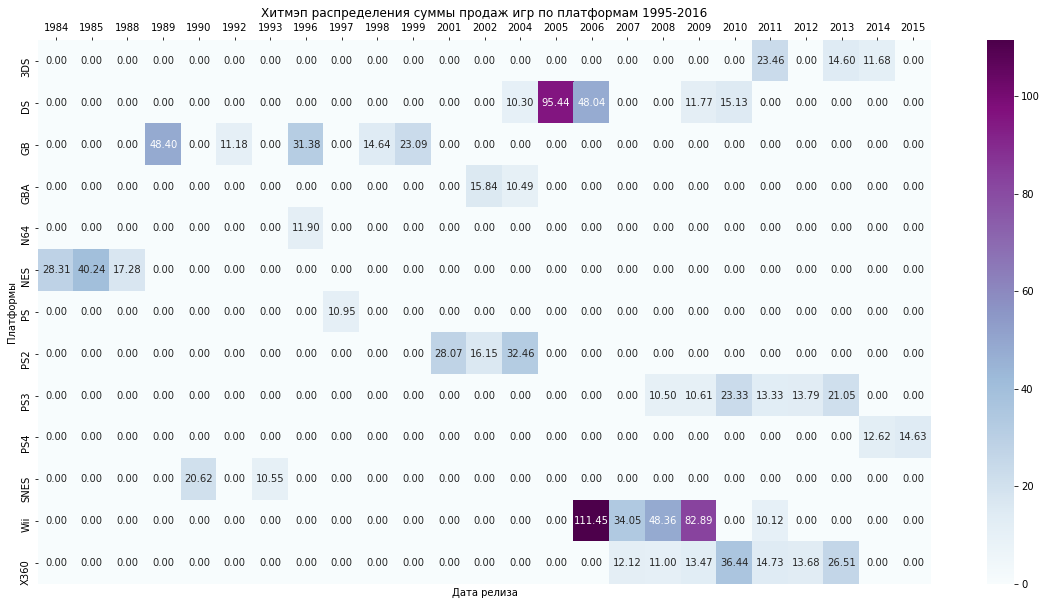

In [38]:
data_heatmap_2 = data.query('total_sales > 10')
sales_by_platforms = data_heatmap_2.pivot_table(index='platform', 
                                      values='total_sales', 
                                      columns = 'year_of_release', 
                                      aggfunc = 'sum',
                                      fill_value=0)


plt.figure(figsize=(20,10))
ax = sns.heatmap(sales_by_platforms, annot=True, cmap='BuPu', fmt=".2f")
ax.set(xlabel="Дата релиза", ylabel="Платформы")
plt.title('Хитмэп распределения суммы продаж игр по платформам 1995-2016')
ax.xaxis.tick_top()

Лидером продаж за всё был был Wii в 2006 году. В целом эта платформа по продажам была популярна до 2009 года, но продержалась всего 4 года. PS3  с 2008 года держалась 7 лет в топе, а потом на смену ей пришла обновленная PS4. X360 была в топе целых 7 лет до 2013. \
Здесь также платформы удерживают большую долю в продажах игр примерно 7 лет, после этого их сменяют другие плтаформы. Это скорее всего связано с разработкой той же компанией новой, обновленной платформы, они перестают поддерживать производство игр на предыдущей.

### Выберем актуальный период

После 2009 года количество игр, а также их продажи пошло на спад, поэтому для  прогноза можно взять срез после этих данных. Однако ситуация, которая +- похожа на актуальную начинается с 2012 года, поэтому стоит взять этот период. \
Так, например, в 2013 году появилась PS4, предыдущие версии которой пользовались высокой популярностью.

In [39]:
data_actual = data.loc[data['year_of_release']>=2012]

### Наиболее прибыльные платформы.

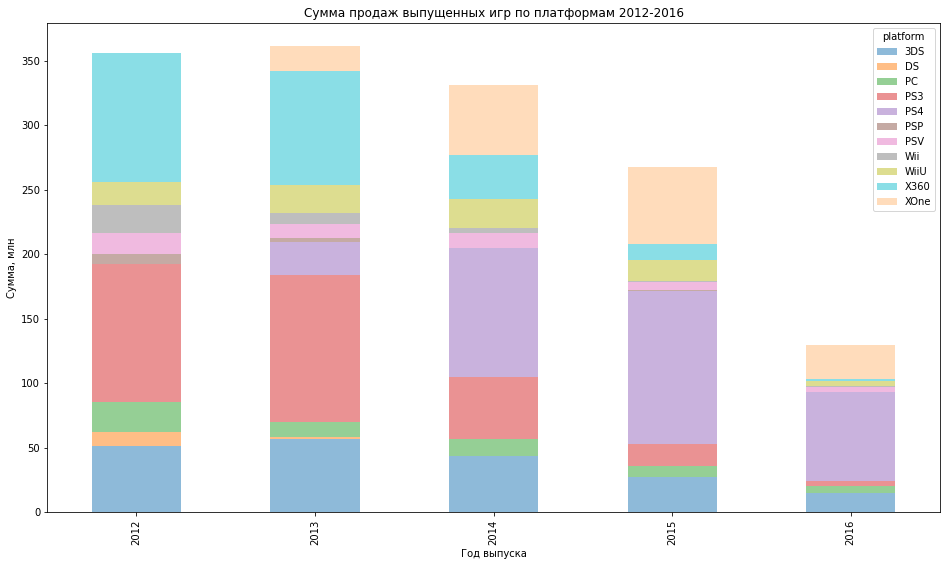

In [40]:
fig, ax = plt.subplots(figsize=(20, 10))

sales_by_platforms = data_actual.pivot_table(index='platform', 
                                      values='total_sales', 
                                      columns = 'year_of_release', 
                                      aggfunc = 'sum')

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2',
          '#dbdb8d', '#9edae5', '#8c6d31', '#393b79', '#637939', '#843c39', '#ad494a', '#d6616b',
          '#e7ba52', '#ce6dbd', '#bd9e39', '#8ca252', '#6b4c9a', '#9c9ede', '#cedb9c', '#8c96c6']

sales_by_platforms.T.plot(kind='bar', stacked=True, ax=ax, figsize=(16,9), alpha=0.5, color=colors);

plt.title('Сумма продаж выпущенных игр по платформам 2012-2016')
plt.ylabel('Сумма, млн')
plt.xlabel('Год выпуска');

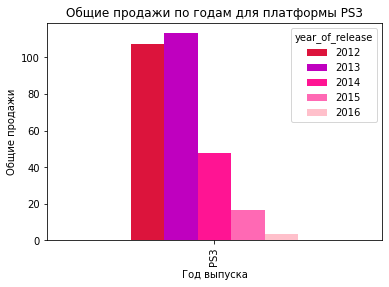

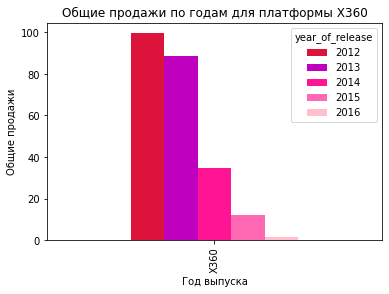

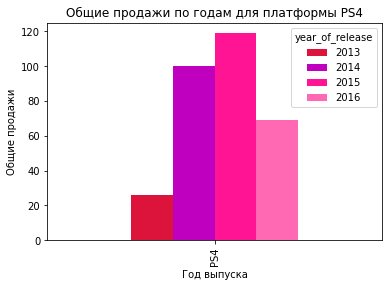

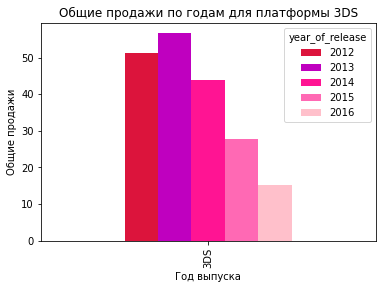

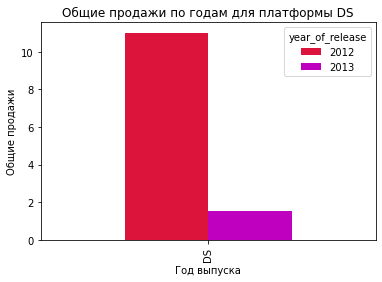

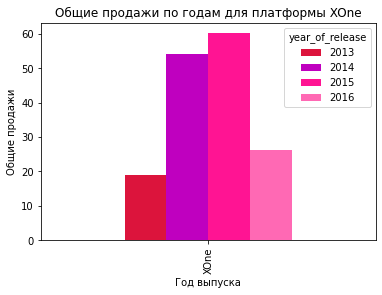

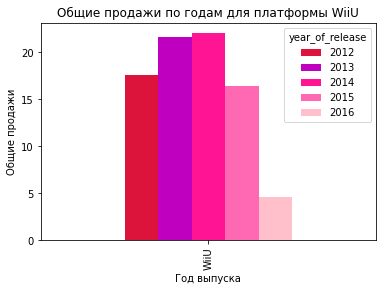

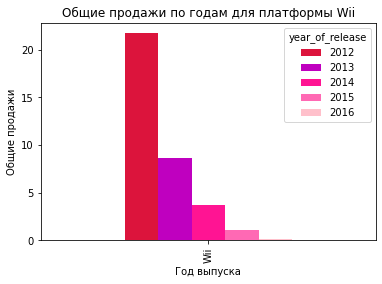

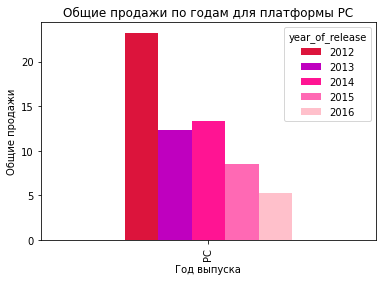

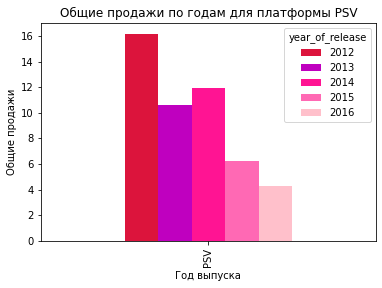

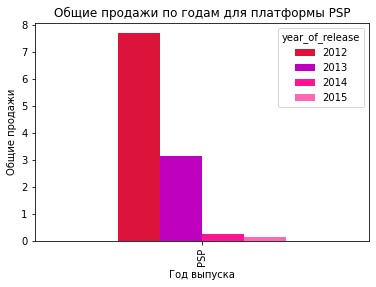

In [41]:
#посмотрим на каждую платформу по отдлености
platforms = data_actual['platform'].unique()
colors = ['crimson', 'm', 'deeppink', 'hotpink', 'pink']

for pl in platforms:
    data_actual.loc[data_actual['platform'] == pl].pivot_table(index='platform', 
                                      values='total_sales', 
                                      columns = 'year_of_release', 
                                      aggfunc = 'sum'). plot(kind='bar', color=colors)
    plt.xlabel('Год выпуска')
    plt.ylabel('Общие продажи')
    plt.title(f'Общие продажи по годам для платформы {pl}')



По графикам каждой отдельной платформе хорошо видно, что почти все платформы утратили свои былые продажи. Это связано с всецелым уменьшение количества продаж у игр. Однако некоторые из плтаформ совсем сошли на нет к 2016 году: PSP, Wii, DS, PS3.

Посмотрим, какие платформы были наиболее прибыльными за все время

In [42]:
data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(7)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14


Можно предположить, какие платформы будут иметь большие продажи в 2017 году:
- PS4 появилась в 2013 году, а значит будет популярна еще примерно 7 и больше лет, как и её предшественники (примерно до 2020-2021). Эта платформа сейчас лидирует по продажам.
- X360, скорее всего, наоборот, к 2017 году почти исчезнет из статистики. Однако популярность начала набирать XOne, которая, скорее всего, будет еще более распространена в 2017.
- Еще примерно один год будут хорошие продажи у 3DS

PS2 и X360 являются наиболее прибыльными игровыми платформами за период 20212-2016. Более того, все версии PS находятся в топ-7 в этом рейтинге. Поэтому, при появлении новой версии можно ставить ставку по большим продажам на нее, а также знать, что её актуальная версия будет популярна еще некоторое количество лет после появления новой.

### Построим "ящик с усами"

In [43]:
sales_and_platforms = data_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()
sales_and_platforms

,platform,total_sales
0,PS4,314.14
1,PS3,288.78
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


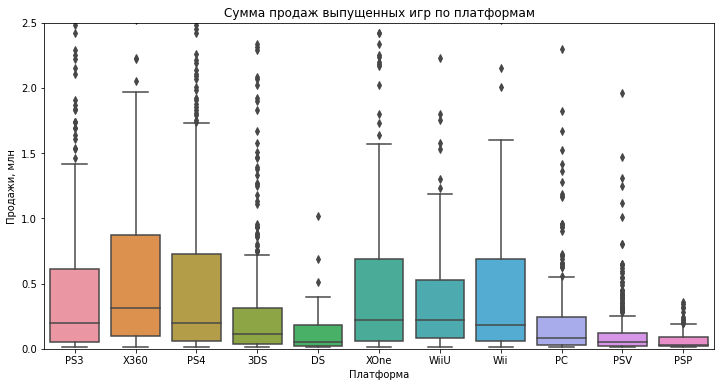

In [44]:
plt.figure(figsize=(12,6))

ax = sns.boxplot(x='platform', y='total_sales', data=data_actual)
ax.set_ylim(0, 2.5)

plt.title('Сумма продаж выпущенных игр по платформам')
plt.ylabel('Продажи, млн')
plt.xlabel('Платформа');

<div class="alert alert-success"; style="border-left: 7px solid green">
<h5> ✔️ <font color="green">Комментарий ревьюера (зеленый)</font></h5>

Рад, что ты используешь ylim, так понятнее.

</div>

На графике можно увидеть, что медианное значение платформ обычно смещены вниз, значит дешевых игр у таких платформ больше, чем дорогих. На графиках заметно, что есть довольно много выбросов, а значит очень дорогих игр. У 3DS, PS4, PS3 таких очень много, а у DS или Wii, наоборот, меньше. При планировании рекламной кампании можно опираться на "категорию стоимости" игры (более дешевые игры покупают у определенных платформ и в то же время более дорогие - у других). Так, например,  более дорогие игры могут хорошо продаваться на X360, 3DS, XOne, а более дешевые у PSv, DS. Если сравнивать двух конкурентов PS и Х360 (и XOne), то медиана у X360 находится выше, а значит более дорогих игр там больше.

### Как влияют отзывы на продажи

Для выявления зависимости отзывов и продаж возьмем данные о платформе PS4.

In [45]:
data_PS4 = data.query('platform == "PS4"')
data_PS4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unrated,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unrated,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16498,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,unrated,0.01
16501,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unrated,0.01
16524,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16528,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


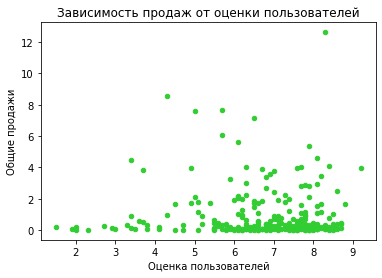

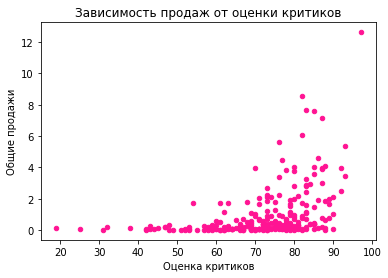

In [46]:
#построим диаграмму рассеяния с отзывами пользователей
data_PS4.plot(x='user_score', y='total_sales',  kind='scatter', color='limegreen')

plt.title('Зависимость продаж от оценки пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Общие продажи');
plt.show()

#построим диаграмму рассеяния с отзывами критиков
data_PS4.plot(x='critic_score', y='total_sales',  kind='scatter', color='deeppink')

plt.title('Зависимость продаж от оценки критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Общие продажи');
plt.show()

<div class="alert alert-success"; style="border-left: 7px solid green">
<h5> ✔️ <font color="green">Комментарий ревьюера (зеленый)</font></h5>

Полный вывод, правильно посчитана и интерпретирована корреляция.

</div>

In [47]:
#посчитаем корреляцию пользовательских оценок и продаж
round(data_PS4['user_score'].corr(data_PS4['total_sales']), 2)

-0.03

In [48]:
round(data_PS4['critic_score'].corr(data_PS4['total_sales']), 2)

0.41

Коэффициент корреляции показал, что сила связи у продаж и оценки пользователей очень мала, её почти нет - коэффициент всего 0.03. Это видно и на диаграмме рассеяния: высокие оценки пользователей есть как на низких, так и на высоких продажах. На этот показатель при планировании продаж лучше не опираться. \
Другая ситуаци у оценок критиков, зависимость опредленно есть, хоть она и нелинейная, поэтому коэффициент корреляции показал слабую прямую связь - 0.4. На графике же мы видим, что, действительно, игры с большим рейтингом от критиков собирают больше денег. На этот показатель уже можно опираться.

Посмотрим на коэффициент корреляции на примере других популярных платформ: X360, XOne, PS3.

In [49]:
for_corr = ['X360', 'XOne', 'PS3']

In [50]:
for i in for_corr:
    data_for_corr = data.query('platform == @i')
    print(i)
    print('Корелляция продаж с оценкой пользователей', round(data_for_corr['user_score'].corr(data_for_corr['total_sales']), 2))
    print('Корелляция продаж с оценкой критиков', round(data_for_corr['critic_score'].corr(data_for_corr['total_sales']), 2))
    print()


X360
Корелляция продаж с оценкой пользователей 0.11
Корелляция продаж с оценкой критиков 0.39

XOne
Корелляция продаж с оценкой пользователей -0.07
Корелляция продаж с оценкой критиков 0.42

PS3
Корелляция продаж с оценкой пользователей 0.13
Корелляция продаж с оценкой критиков 0.43



Ситуция почти такая же, с оценкой пользователей связь очень мала, а с оценкой критиков побольше. Поэтому можно сделать вывод, что такое правило работает для всех платформ. 

### Распределение игр по жанрам

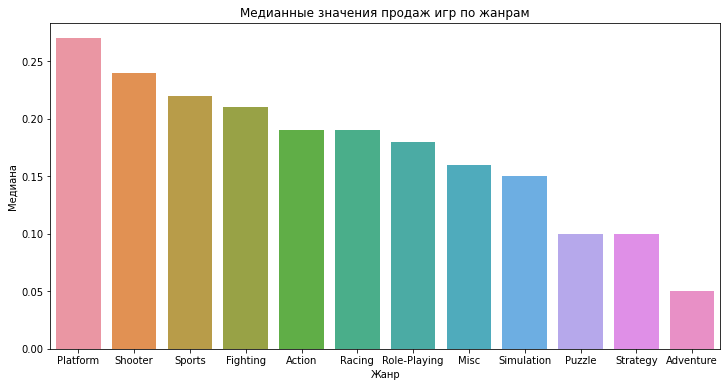

In [51]:
data_by_genre = data.pivot_table(index='genre', 
                 values='total_sales' ,
                 aggfunc='median').sort_values(by='total_sales', ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=data_by_genre, x='genre', y='total_sales')

plt.xlabel('Жанр')
plt.ylabel('Медиана')
plt.title('Медианные значения продаж игр по жанрам');


In [52]:
data_by_genre

,genre,total_sales
0,Platform,0.27
1,Shooter,0.24
2,Sports,0.22
3,Fighting,0.21
4,Action,0.19
5,Racing,0.19
6,Role-Playing,0.18
7,Misc,0.16
8,Simulation,0.15
9,Puzzle,0.10


Самый популярный жанр - это платформенные игры, мх медианные продажи за игру составляют 0.25 млн. Топ-3 жанра: Platform, Sports, Shooter. Наименее прибыльный жанр - это Adventure, в датафрейме медианные продажи такой игры всего 0.05 млн. Также непопулярны Strategy и Puzzle.

При исследовательском анализе данных были выявлены некоторые полезные закономерности. Так количество игр начало расти в 1994 году, наибольшее их количество выпускалось в период с 2002 по 2011 год, но в данный момент происхотит падение. Выяснилось, что период поппулярности той или иной платформы составляет примерно 7 лет. На основе таких данных были выявлены закономерности, которые говорят что в ближайшее время в топе по продажам будут PS4 и Xone. Однако X360, наоборот, потеряет актуальность. PS4 и PS3 были наиболее прибыльными и популярными платформами для игр за все время, а на 3 месте X360. \
В результате анализа также выяснилось, что некоторые плаформы продают более дорогие игры, а некоторые - дешевые. Так, например, более дорогие игры могут хорошо продаваться на X360, 3DS, XOne, а более дешевые у PSv, DS. \
Была найдена прямая корреляция между оценками критиков и продажами игр на платформе. То есть чем выше оценка игр на платформе, тем больше продаж она делает. В то же время, подобной корреляции между оценками пользователей и продажами не найдено. \
Что касается жанров, то самыми прибыльными у производителей игр явялются Platform, Sports, Shooter. Паззлы,стратегии и приключения продаются хуже.

# 5. Портрет пользователя каждого региона

### Самые популярные платформы по продажам в разных регионах

In [53]:
sales_regions = data_actual.pivot_table(index='platform', values=['na_sales', 
                                                  'eu_sales', 
                                                  'jp_sales', 
                                                  'other_sales'] , aggfunc='sum').sort_values(by='na_sales').reset_index()

In [54]:
na_sales = sales_regions['na_sales']
eu_sales = sales_regions['eu_sales']
jp_sales = sales_regions['jp_sales']
other_sales = sales_regions['other_sales']

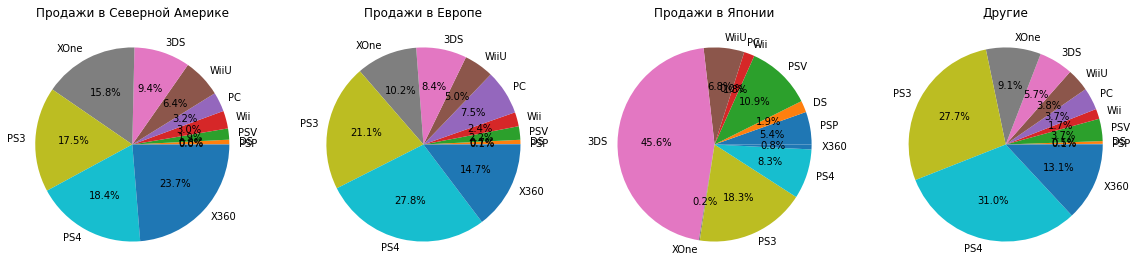

In [55]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))

ax1.pie(na_sales, labels=sales_regions['platform'], autopct='%1.1f%%')
ax1.set_title('Продажи в Северной Америке')

ax2.pie(eu_sales, labels=sales_regions['platform'], autopct='%1.1f%%')
ax2.set_title('Продажи в Европе')

ax3.pie(jp_sales, labels=sales_regions['platform'], autopct='%1.1f%%')
ax3.set_title('Продажи в Японии')

ax4.pie(other_sales, labels=sales_regions['platform'], autopct='%1.1f%%')
ax4.set_title('Другие');

По круговым диаграммам можно выделить топ-5 жанров. В Северной Америке это: x360(доля 23%), PS4(18%), PS3(17%), Xone(16%), 3DS(9%). В Квропе лидеры почти не отличаются, однако на первом месте стоит PS4. Top-5: PS4(27%), PS3, x360, XOne, 3DS. Япония уже сильнее отличается по платформам, так как у нее в топе находятся только платформы их производства. Топ-5: 3DS, PS3, PS4, PSV, WiiU. В других станах распредедение как в Европе.

<div class="alert alert-warning"; style="border-left: 7px solid Gold">
<h5> ⚠️ <font color="DarkGoldenRod">v2 Комментарий ревьюера (желтый)</font></h5>

✅ Красивые графики, сравнение верное, выводы соответствуют графикам. 👍
    
Категорию «Другие» можно сделать так:
    
- группируем данные, выделяем топ-5
- из сгруппированных данных убираем топ-5 и считаем общие показатели по сгруппированным данным
- после формируем новый датафрейм, чтобы он по структуре подгодил к сгрупированным топ-5
- добавляем строку «Другие» в таблицу сгруппированную по топ-5 методом [concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

</div>

### Самые популярные жанры в разных регионах

In [57]:
sales_regions = data_actual.pivot_table(index='genre', values=['na_sales', 
                                                  'eu_sales', 
                                                  'jp_sales', 
                                                  'other_sales'] , aggfunc='sum').sort_values(by='na_sales').reset_index()

In [58]:
na_sales = sales_regions['na_sales']
eu_sales = sales_regions['eu_sales']
jp_sales = sales_regions['jp_sales']
other_sales = sales_regions['other_sales']

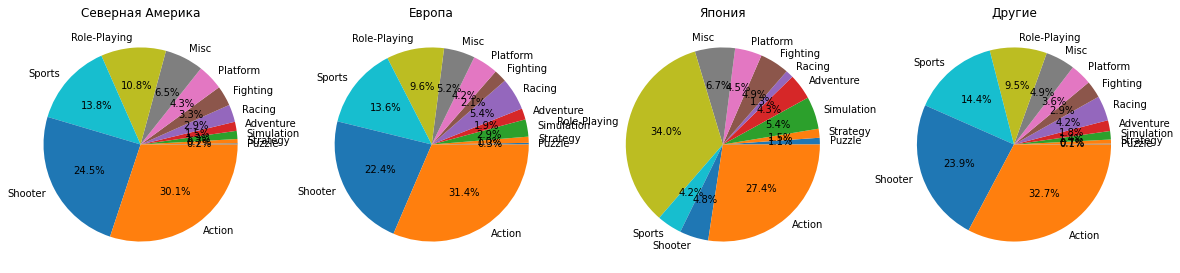

In [59]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))

ax1.pie(na_sales, labels=sales_regions['genre'], autopct='%1.1f%%')
ax1.set_title('Северная Америка')

ax2.pie(eu_sales, labels=sales_regions['genre'], autopct='%1.1f%%')
ax2.set_title('Европа')

ax3.pie(jp_sales, labels=sales_regions['genre'], autopct='%1.1f%%')
ax3.set_title('Япония')

ax4.pie(other_sales, labels=sales_regions['genre'], autopct='%1.1f%%')
ax4.set_title('Другие');

Топ-5 жанров в Европе: Action, Shooter, Sports, Role-playing, Racing. \
В Японии: Role-playing, Action, Misc, Shooter, Sports. \
В Северной Америке: Action, Shooter, Sports, Role-playing,Racing.\
В других странах: Action, Shooter, Sports,Role-playing, Racing.\
Экшны очень популярны во всех странах. В целом ситуация по жанрам немного отличается только в Японии. ВО всем мире популярны шутеры и спортивные игры. В японии в это же время предпочитают аркады.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [60]:
sales_rating = data_actual.pivot_table(index='rating', values=['na_sales', 
                                                  'eu_sales', 
                                                  'jp_sales', 
                                                  'other_sales'], aggfunc='sum').sort_values(by='other_sales').reset_index()

In [61]:
sales_rating

,rating,eu_sales,jp_sales,na_sales,other_sales
0,E10+,55.37,8.19,75.70,16.23
1,T,52.96,26.02,66.02,17.94
2,unrated,91.50,108.84,103.31,27.17
3,E,113.02,28.33,114.37,31.44
4,M,193.96,21.20,231.57,63.38


In [62]:
na_rating = sales_rating['na_sales']
eu_rating = sales_rating['eu_sales']
jp_rating = sales_rating['jp_sales']
other_rating = sales_rating['other_sales']

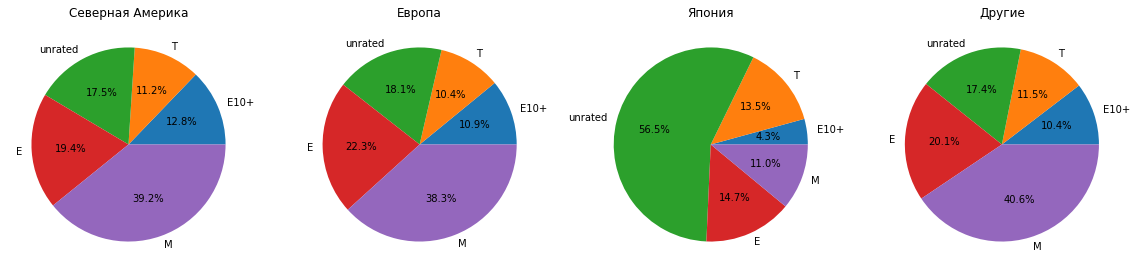

In [63]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))

ax1.pie(na_rating, labels=sales_rating['rating'], autopct='%1.1f%%')
ax1.set_title('Северная Америка')

ax2.pie(eu_rating, labels=sales_rating['rating'], autopct='%1.1f%%')
ax2.set_title('Европа')

ax3.pie(jp_rating, labels=sales_rating['rating'], autopct='%1.1f%%')
ax3.set_title('Япония')

ax4.pie(other_rating, labels=sales_rating['rating'], autopct='%1.1f%%')
ax4.set_title('Другие');

<div class="alert alert-danger"; style="border-left: 7px solid FireBrick">
<h5> ❌ <font color="FireBrick">Комментарий ревьюера (красный)</font></h5>

При данном способе подсчета игры без рейтинга оказываются полностью исключенными из анализа. Но продажи именно этих игр могут указать на ключевое различие в регионах.
    

</div>

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5>    

Готово
</div>

<div class="alert alert-success"; style="border-left: 7px solid green">
<h5> ✔️ <font color="green">v2 Комментарий ревьюера (зеленый)</font></h5>

✅ Верное исправление 👍
 
</div>

Игры с рейтингом M(для взрослых старше 17 лет) занимают самую большую долю в продажах во всех странах, кроме Японии, там наиболее популярны игры без рейтинга.Это, вероятно, связано с тем, что ESRB рейтинг - американского произхождения и многие японские игры не проходиои такую оценку. В остальных странах рейтинг E занимает второе место по продажам, Е10+(Старше 10) - третье и наименее продаваемым считается рейтинг T(Подростки). Можем сделать вывод, что рейтинг игр влияет на количество их продаж (однако причина может быть также и в том, что таких игр в принципе делают больше, но, как мы знаем, спрос рождает предложение, поэтому можно предположить, что некоторые рейтинги более популярны и приносят больше дохода). 

При рассмотрении игр в разрезе продаж по регионам было выявлено, что во всех странах, кроме Японии ситуация с платформами, жанрами и рейтингом примерно одинаковые. Во всем мире PS4 - самая популярная платформа. Популярные во всех странах X360 и XOne принадлежат американской компании Майкрософт, поэтому они не так расространены на японском рынке. \
Экшны очень популярны во всех странах. В целом ситуация по жанрам немного отличается только в Японии. Во всем мире популярны шутеры и спортивные игры. В Японии в это же время предпочитают аркады. \
Было выяснено, что игры с разными рейтингами ESRB приносят разную прибыль, так игры с рейтингом M(для взрослых старше 17 лет) занимают самую большую долю в продажах во всех странах, кроме Японии, там наиболее популярны игры, для которых подобного рейтинга нет, а на втором месте E - для всех.

## **Проверим гипотезы**

### Первая гипотеза

- Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Альтернативня гипотеза: средние пользовательские рейтинги платформ Xbox One и PC не равны

<div class="alert alert-success"; style="border-left: 7px solid green">
<h5> ✔️ <font color="green">Комментарий ревьюера (зеленый)</font></h5>

Верно определена нулевая и альтернативная гипотезы, выбран правильный метод для проведения теста.

</div>

Уровень статистической значимости лучше выбрать 5%, так как для оценки примерно одинаковых средних оценок не нужна очень высокая точность.

In [64]:
score_xone = data.loc[data['platform'] == "XOne", 'user_score'].dropna()
score_pc = data.loc[data['platform'] == "PC", 'user_score'].dropna()

In [65]:
alpha = 0.05 # уровень статистической значимости
results = st.ttest_ind(score_xone, score_pc)

print('Среднее значение оценок на платформе XOne', score_xone.mean())
print('Среднее значение оценок на платформе PC', score_pc.mean())
print()

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC не равны')
else:
    print('Нет оснований отвергнуть нулевую гипотезу. Cредние пользовательские рейтинги платформ Xbox One и PC равны.')
    


Среднее значение оценок на платформе XOne 6.521428571428572
Среднее значение оценок на платформе PC 7.065960264900661

p-value: 1.3037979620149106e-05
Отвергаем нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC не равны


<div class="alert alert-danger"; style="border-left: 7px solid FireBrick">
<h5> ❌ <font color="FireBrick">Комментарий ревьюера (красный)</font></h5>

Выведи, пожалуйста, средние значения выборок, которые сравниваешь.
    

</div>

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5>    

Готово
</div>

<div class="alert alert-success"; style="border-left: 7px solid green">
<h5> ✔️ <font color="green">v2 Комментарий ревьюера (зеленый)</font></h5>

✅ Верное исправление 👍
 
</div>

### Вторая гипотеза

- Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны.
- Альтернативня гипотеза: средние пользовательские рейтинги жанров Action и Sports  не равны.

In [66]:
action = data.loc[data['genre'] == "Action", 'user_score'].dropna()
sports = data.loc[data['genre'] == "Sports", 'user_score'].dropna()


<div class="alert alert-success"; style="border-left: 7px solid green">
<h5> ✔️ <font color="green">Комментарий ревьюера (зеленый)</font></h5>

Хорошо, что убраны пустые значения.

</div>

In [67]:
alpha = 0.05 # уровень статистической значимости
results = st.ttest_ind(action, sports)

print('Среднее значение оценок жанра "Action"', action.mean())
print('Среднее значение оценок жанра "Sports"', sports.mean())
print()

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Cредние пользовательские рейтинги жанров Action и Sports не равны.')
else:
    print('Нет оснований отвергнуть нулевую гипотезу. Cредние пользовательские рейтинги жанров Action и Sports равны.')

Среднее значение оценок жанра "Action" 7.058129175946549
Среднее значение оценок жанра "Sports" 6.9527777777777775

p-value: 0.06833686503882228
Нет оснований отвергнуть нулевую гипотезу. Cредние пользовательские рейтинги жанров Action и Sports равны.


## **Вывод**

Был проведен анализ данных по играм за период 1980-2016 год, позже многие выводы были основаны на срезе от 2012 по 2016  годы. Мы выявили некоторые закономерности, которые могут определетить успешность игры. Также сделана предоработка данных:
- заменены некорректные значения в столбце rating
- удалены пустые значения в столбцах с годом выпуска, платформой и именем.
- добавлен столбец с суммой продаж по всем регионам

Что касается закономерностей, определяющих успешность игры, то:

- Так, в данный момент происходит падение количества выпускаемых игр и их продаж (на это могут быть разные причины, в том числе увеличение кол-ва бесплатных игр. Выяснилось, что период популярности той или иной платформы составляет примерно 7 лет. На основе таких данных были выявлены закономерности, которые говорят что в ближайшее время в топе по продажам будут PS4 и Xone. Однако X360, наоборот, потеряет актуальность. PS4 и PS3 были наиболее прибыльными и популярными платформами для игр за все время, а на 3 месте X360. На эти данные стоит опираться при проведении рекламных кампаний и при продаже игр. 

- В результате анализа также выяснилось, что некоторые плаформы продают более дорогие игры, а некоторые - дешевые. Так, например, более дорогие игры могут хорошо продаваться на X360, 3DS, XOne, а более дешевые у PSv, DS. XBox и XOne обычно продают более дорогие игры, чем приставки PS. 

- На продажи игр влиет оценка их критиков. Чем выше она, тем более вероятно продать игру по более высокой цене.В то же время, подобной корреляции между оценками пользователей и продажами не найдено. 

- Самый популярный жанр - это платформенные игры, мх медианные продажи за игру составляют 0.25 млн. Топ-3 жанра: Platform, Sports, Shooter. Наименее прибыльный жанр - это Adventure, в датафрейме медианные продажи такой игры всего 0.05 млн. Также непопулярны Strategy и Puzzle. При планировании рекламных кампаний, стоит учитывать, на какой жанр делат акцент, а на какой нет. \

- Однако всегда нужно учитывать регион продажи игр. В Японии лучше продавать аркады, игры с приключениями. Экшены популярны везде. А вот на шутеры в Японии ставку лучше не делать, в отличии от всех остальных стран. В целом японский рынок довольно специфичный, судя по статистике, поэтому на него лучше придумывать специальный, отдельный подход. 

- Рейтинг игр также влияет на их популярность. В ходе анализа выяснилось, что игры с рейтингом M(для взрослых старше 17 лет) занимают самую большую долю в продажах во всех странах, кроме Японии, там наиболее популярны игры, для которых подобного рейтинга нет (вероятно из-за того, что в японских играх предпочитают не использовать американскую систему присваивания рейтинга), а на втором месте E - для всех. В остальных странах рейтинг E тоже занимает второе место по продажам, Е10+(Старше 10) - третье и наименее продаваемым считается рейтинг T(Подростки). 

- В ходе анализа также были проверены гипотезы. Одна из таких проверок доказала, что  игровые платформы  Xbox One и PC не имеют  одинаковый средних пользовательских рейтингов. Вторая гипотеза сказала о том, что средние пользовательские рейтинги жанров Action и Sports равны. В целом, это одни из самых популярных жанров.

**Таким образом**, были выведены некоторые закономерности, которые определеются успешность игры. Так, например, можно смело делать ставку на игры, которые выйдут на платформе PS4 и Xone. Жанр лучше выбирать платформенные игры, спортивные или шутеры. Также популярными будут игры с рейтингом M(для взрослых и детей старше 17 лет). Более дорогие игры лучше продаются на X360, 3DS, XOne, а более дешевые у PSv, DS.  Очень важно всегда учитывать регион для рекламиной кампании, так как рынок запросы у японскго рынка отличаются от остальных.


<div class="alert alert-danger"; style="border-left: 7px solid FireBrick">
<h5> ❌ <font color="FireBrick">Комментарий ревьюера (красный)</font></h5>

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.

Также жду от тебя комментарии, где вкратце опишешь изменения, которые были внесены.
    

</div>

<div class="alert alert-danger"; style="border-left: 7px solid FireBrick">
<h5> ❌ <font color="FireBrick">v2 Комментарий ревьюера (красный)</font></h5>
    
Извиняюсь, почему-то предыдущий комментарий не верно сохранился.
    
Планировал отправить следующее:

В общем выводе хочется тезисно видеть все промежуточные выводы с цифрами. Это очень важно, поскольку топ-менеджеры, в большинстве своем, смотрят сразу сюда и только сюда...

Тут важно обратиться к целям, которые были озвучены в самом начале и ответить на все вопросы. Важно оформить все тезисно и с цифрами. Еще важно описать все промежуточные выводы, которых не прописано в целях.
Вкратце структура такая:
- как были предобработаны данные(тут важно написать про изменения, если заполнялись пропуски или преобразовывались строки)
- пройдись по целям и ответь на вопросы
- добавь промежуточные выводы, которые считаешь нужным отметить

Еще очень важно помнить, для кого ты делаешь проект, в зависимости от этого нужно сделать определенные акценты. В данном случае проект учебный, поэтому нужно ориентироваться по описанию.

Для красивого оформления можешь воспользоваться [Кратким руководством по Маркдауну](https://paulradzkov.com/2014/markdown_cheatsheet/).

</div>

<div class="alert alert-success"; style="border-left: 7px solid green">
<h5> ✔️ <font color="green">v3 Комментарий ревьюера (зеленый)</font></h5>

✅ Спасибо, очень хороший и подробный общий вывод, которые содержит все промежуточные результаты 👍
 
</div>